<a href="https://colab.research.google.com/github/madz23/madz_nnprojects/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5: Predict Time Series
Applied Neural Networks 

Madison May


19 April 2022

**Part 1**</br>
Generate a time series dataset (10000 series with 100 points each). Build these from two sine waves and noise, similar to what we did in class, HOWEVER instead of adding the two sine waves together you will MULTIPLY them, each weighted the same (and then add noise). This will create an oscillating signal of the shorter wavelength sine with an overlaid oscillating "envelope" from the larger wavelength sine. <br/>
Graph several example series.

In [1]:
# start with some sine waves
import matplotlib.pyplot as plt
import numpy as np

# first get time for x
time = np.arange(0, 4 * np.pi, 0.1) # 0 to 4pi, 2 cycles of a sin wave

In [2]:
# now we can graph the sin wave
sin_1 = np.sin(time)
sin_2 = np.sin(7 * time + .25 * np.pi)

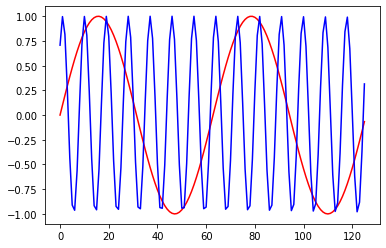

In [3]:
plt.plot(sin_1, color = 'r')
plt.plot(sin_2, color = 'b')

In [4]:
# get some noise. should be the same length as our x time
noise = np.random.random(len(time))
# math is fun. get every number in noise between -1 and 1
noise = 2 * noise - 1

noise

array([-0.0718044 ,  0.10462197,  0.36477451,  0.96895517,  0.86979742,
        0.36906627,  0.64265732, -0.44121734, -0.3392778 , -0.88201571,
        0.64477689,  0.04676288,  0.66218698, -0.53453774, -0.31477001,
       -0.25592023, -0.33905952,  0.98782947, -0.7426018 ,  0.82265426,
        0.3127818 , -0.44200759,  0.95237449, -0.46082214, -0.15419517,
       -0.81634767, -0.87601279, -0.77028798,  0.09777354,  0.93600144,
        0.31930893, -0.01398835, -0.86341189, -0.26339408,  0.07396986,
       -0.21904704,  0.47591114, -0.92495704, -0.61944723,  0.31705916,
        0.97824368,  0.05490458, -0.10125691, -0.94563361, -0.53849853,
        0.69573606,  0.83034122,  0.73045778, -0.97999424, -0.23864356,
        0.04566692, -0.99401775, -0.59531456,  0.96670474, -0.24566044,
       -0.07792416,  0.13423623, -0.71874179,  0.52674772, -0.87787603,
        0.08299464, -0.49890894, -0.95999777, -0.54584447, -0.32871503,
        0.16470161,  0.45818318, -0.10097701,  0.75968225, -0.08

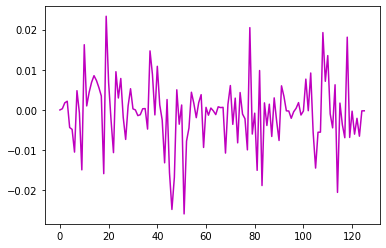

In [5]:
# create a signal
# make sure to MULTIPLY rather than add
sound = sin_1 * 0.15 * sin_2 * 0.2 * noise
plt.plot(sound, color = 'm')

In [6]:
sound.shape

(126,)

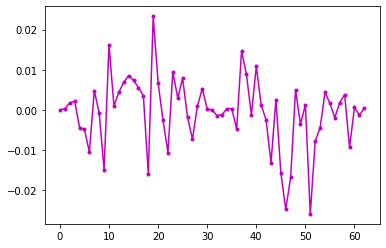

In [7]:
plt.plot(sound[:(int(len(sound) / 2))], marker='o', markersize=3, color='m')
# data points to actually give our model

In [8]:
# This was a nice illustration of how these waves are made. Now we need to actually build a dataset

def make_waves(amount: int):
  time = np.arange(0, 10, 0.1)
  data = np.empty((amount, 100)) # we want our waves to be 100 points each
  for i in range(amount):
    # just like what I did above. read that for a more in-depth description
    # the first wave
    frequency = np.random.uniform(0.2, 5)
    offset = np.random.uniform(-1, 1)
    sin_1 = np.sin(frequency * time + offset * np.pi)
    # the second wave
    frequency = np.random.uniform(0.2, 5)
    offset = np.random.uniform(-1, 1)
    sin_2 = np.sin(frequency * time + offset * np.pi)
    # noise
    noise = np.random.random(len(time))
    noise = 2 * noise - 1
    # signal
    sound = sin_1 * 0.15 * sin_2 * 0.2 * noise
    sound.shape
    data[i, :] = sound
  return data

In [9]:
# call generate_waves and make a dataset 10000 series with 100 points each
dataset = make_waves(10000)
dataset.shape

(10000, 100)

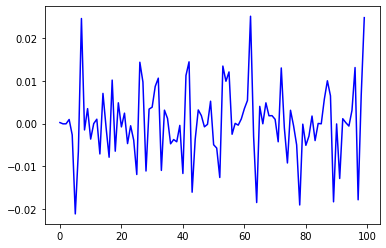

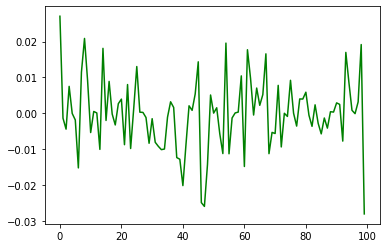

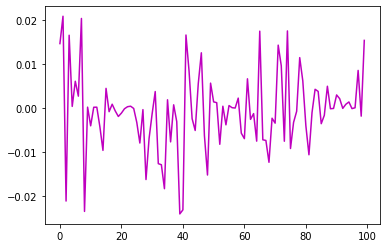

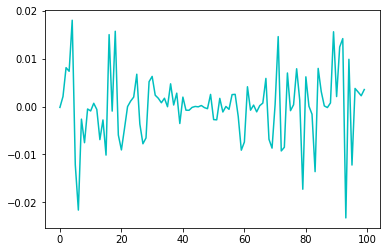

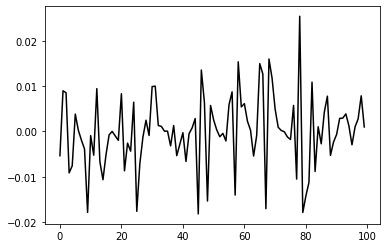

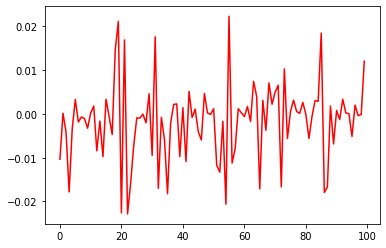

In [10]:
# plot several example series
colors = ['b', 'g', 'm', 'c', 'k', 'r']
import random
for i in range(len(colors)):
  plt.figure(i)
  plt.plot(dataset[random.randrange(len(dataset))], color=colors[i])

**Part 2** </br>
Predict the 81st point.<br/>
Use the first 80 points for training. Create training, validation, and testing sets. Utilize an RNN.</br>
Give your testing and validation accuracies, and graph a couple series (including prediction and actual 81st points).


In [11]:
# set up training data using first 80 points
X_train = dataset[:7000, :80] # first 7000 waves and their first 80 points
y_train = dataset[:7000, 80]
X_valid = dataset[7000:9000, :80]
y_valid = dataset[7000:9000, 80]
X_test = dataset[9000:, :80]
y_test = dataset[9000:, 80]
X_train

array([[ 0.00095109,  0.00108458, -0.00125147, ..., -0.01182387,
         0.01327847, -0.00744871],
       [ 0.02033017, -0.01142469,  0.007127  , ...,  0.0013982 ,
        -0.00925043,  0.00531576],
       [-0.00032114, -0.0052377 ,  0.01451733, ..., -0.00215096,
        -0.00603167, -0.00643208],
       ...,
       [ 0.01232081,  0.01863044, -0.01606046, ..., -0.00188242,
         0.00109811,  0.00313671],
       [-0.00469301, -0.00424814, -0.00081247, ...,  0.00338037,
        -0.00073162, -0.00077008],
       [-0.01363715, -0.0003394 , -0.00428717, ...,  0.00395757,
        -0.01393116, -0.01193471]])

In [12]:
X_train.shape

(7000, 80)

In [13]:
y_train

array([-0.0036846 , -0.00103491,  0.00209503, ..., -0.01253061,
       -0.00056582,  0.00196301])

In [14]:
X_test

array([[ 8.82681090e-03,  2.29595963e-02,  8.13476457e-03, ...,
         5.43212239e-04, -6.67659102e-03,  1.41437025e-02],
       [ 1.02323550e-02, -2.74472204e-02,  1.77686386e-02, ...,
         1.53530342e-03,  1.89919265e-03, -9.19269080e-04],
       [ 9.14635619e-04,  1.01209994e-03,  1.01961241e-04, ...,
         7.74585041e-03,  4.15293977e-03, -1.37683055e-02],
       ...,
       [-3.72148042e-03, -1.49120771e-02,  1.94768354e-04, ...,
        -8.00248207e-03,  9.49547966e-03, -5.36714316e-03],
       [ 3.59168731e-03, -1.49018216e-02,  2.04624946e-02, ...,
        -4.85784433e-03, -1.92482853e-03, -1.62136594e-05],
       [ 8.16852259e-03, -7.97987180e-03, -1.48484585e-02, ...,
         4.52714984e-03,  2.79399252e-03, -8.25060161e-03]])

In [15]:
# A simple RNN to run the prediction
X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train.shape

(7000, 80, 1)

In [16]:
def plot_pred(y_pred, y_true, signal):
  """a function to display how off the predicted point and actual point were"""
  plt.plot(signal, marker='o', markersize=3)  
  plt.plot(len(signal)+1, y_true, marker='o', markersize=5, color='r', label = 'actual point') # 81st point
  plt.plot(len(signal)+1, y_pred, marker='s', label = 'predicted point')  # predicted 81st point
  plt.show()

In [17]:
# compile the model
from tensorflow import keras
model = keras.models.Sequential([
              keras.layers.SimpleRNN(1, input_shape=[None,1]) 
])

In [18]:
optimizer = keras.optimizers.Adam(learning_rate=0.005) 
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 14s 51ms/step - loss: 0.0011 - val_loss: 2.4175e-04
Epoch 2/100
219/219 [==============================] - 11s 51ms/step - loss: 1.6252e-04 - val_loss: 9.9512e-05
Epoch 3/100
219/219 [==============================] - 11s 51ms/step - loss: 8.7777e-05 - val_loss: 8.3003e-05
Epoch 4/100
219/219 [==============================] - 12s 54ms/step - loss: 7.8727e-05 - val_loss: 7.6695e-05
Epoch 5/100
219/219 [==============================] - 11s 51ms/step - loss: 7.7539e-05 - val_loss: 7.6543e-05
Epoch 6/100
219/219 [==============================] - 11s 51ms/step - loss: 7.7243e-05 - val_loss: 7.7662e-05
Epoch 7/100
219/219 [==============================] - 11s 51ms/step - loss: 7.8783e-05 - val_loss: 7.6645e-05
Epoch 8/100
219/219 [==============================] - 11s 50ms/step - loss: 7.7220e-05 - val_loss: 7.7759e-05
Epoch 9/100
219/219 [==============================] - 11s 51ms/step - loss: 7.9776e-05 - val_loss: 7.6590e-05
Epoch

In [19]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 7ms/step - loss: 7.8162e-05


7.81615381129086e-05

In [20]:
prediction = model.predict(X_train)
prediction

array([[-0.0004651 ],
       [-0.00048379],
       [-0.00039226],
       ...,
       [-0.00046691],
       [-0.0005057 ],
       [-0.00034854]], dtype=float32)

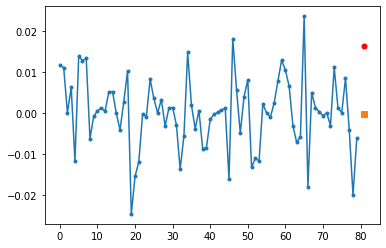

In [21]:
# some example predictions made by this model
wave = 9
plot_pred(prediction[wave], y_train[wave], X_train[wave])

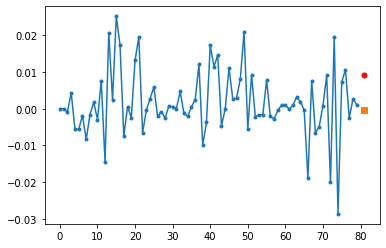

In [22]:
wave = 5
plot_pred(prediction[wave], y_train[wave], X_train[wave])

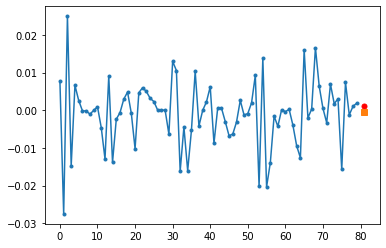

In [23]:
wave = 12
plot_pred(prediction[wave], y_train[wave], X_train[wave])

In [24]:
# maybe try a deep RNN 
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]), 
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(1)
])

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.005) 
model.compile(loss="mse", optimizer=optimizer, metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 66s 291ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 8.1181e-05 - val_accuracy: 0.0000e+00
Epoch 2/100
219/219 [==============================] - 64s 291ms/step - loss: 1.0265e-04 - accuracy: 0.0000e+00 - val_loss: 8.1035e-05 - val_accuracy: 0.0000e+00
Epoch 3/100
219/219 [==============================] - 63s 286ms/step - loss: 9.2771e-05 - accuracy: 0.0000e+00 - val_loss: 1.3112e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
219/219 [==============================] - 62s 285ms/step - loss: 1.1439e-04 - accuracy: 0.0000e+00 - val_loss: 8.3776e-05 - val_accuracy: 0.0000e+00
Epoch 5/100
219/219 [==============================] - 63s 288ms/step - loss: 1.1354e-04 - accuracy: 0.0000e+00 - val_loss: 1.1584e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
219/219 [==============================] - 63s 288ms/step - loss: 1.0565e-04 - accuracy: 0.0000e+00 - val_loss: 1.0845e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
219/219 [===========

In [30]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 27ms/step - loss: 8.8567e-05 - accuracy: 0.0000e+00


[8.856660861056298e-05, 0.0]

In [31]:
prediction = model.predict(X_train)

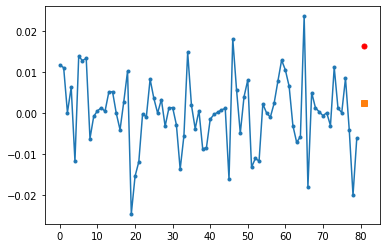

In [32]:
# predictions made by the deep RNN
# some example predictions made by this model
wave = 9
plot_pred(prediction[wave], y_train[wave], X_train[wave])

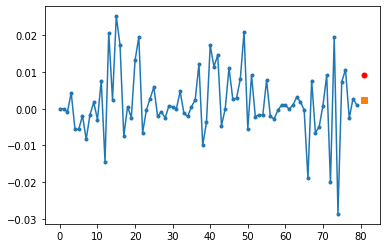

In [33]:
wave = 5
plot_pred(prediction[wave], y_train[wave], X_train[wave])

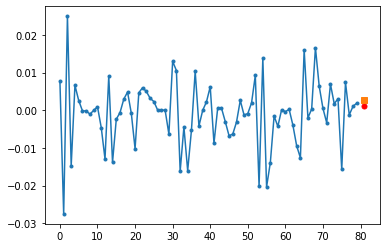

In [34]:
wave = 12
plot_pred(prediction[wave], y_train[wave], X_train[wave])

**Part 3** </br>
Predict the 81-90th points.</br>
Use the first 80 points for training. Create training, validation, and testing sets. Create at least **one sequence-to-vector** RNN and **one sequence-to-sequence** RNN and compare their results.<br/>
Give your testing and validation accuracies, and graph a couple series (including prediction and actual 81-90th points) for both RNNs.

In [35]:
keras.backend.clear_session()

In [36]:
# Sequence-to-Vector RNN

# Currently the y data sets are only for one point. We need them to predict 10
n = 10
Y_train = dataset[:7000, 80:80 + n]
Y_valid = dataset[7000:9000, 80:80 + 10]
Y_test = dataset[9000:, 80:80 + 10]
Y_train.shape

(7000, 10)

In [37]:
from tensorflow import keras
# build a model
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]), 
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20), 
              keras.layers.Dense(n)  
])

In [38]:
# compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.005) 
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, Y_train, epochs=50, # now we are using the new Y datasets
                    validation_data = (X_valid, Y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
219/219 [==============================] - 38s 167ms/step - loss: 0.0218 - val_loss: 9.6658e-05
Epoch 2/50
219/219 [==============================] - 36s 166ms/step - loss: 9.4483e-05 - val_loss: 1.2929e-04
Epoch 3/50
219/219 [==============================] - 36s 166ms/step - loss: 8.7637e-05 - val_loss: 8.5849e-05
Epoch 4/50
219/219 [==============================] - 36s 166ms/step - loss: 8.4473e-05 - val_loss: 9.1480e-05
Epoch 5/50
219/219 [==============================] - 36s 165ms/step - loss: 8.5385e-05 - val_loss: 1.0715e-04
Epoch 6/50
219/219 [==============================] - 37s 167ms/step - loss: 8.8296e-05 - val_loss: 8.7408e-05


In [39]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 1s 16ms/step - loss: 8.5950e-05


8.595002873335034e-05

In [40]:
prediction = model.predict(X_train)

In [41]:
def plot_vector_pred(Y_pred, Y_true, signal):
  plt.plot(signal, marker='o', markersize=3)  
  start = len(signal) + 1
  plt.plot(np.arange(start, start + n), Y_pred, marker='s')  
  plt.plot(np.arange(start, start + n), Y_true, marker='o', markersize=5, c='red')  
  plt.show()

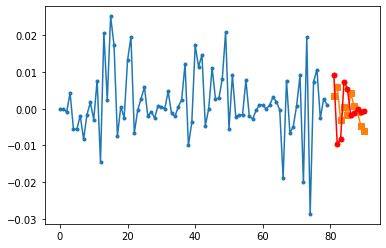

In [42]:
wave = 5
plot_vector_pred(prediction[wave], Y_train[wave], X_train[wave])

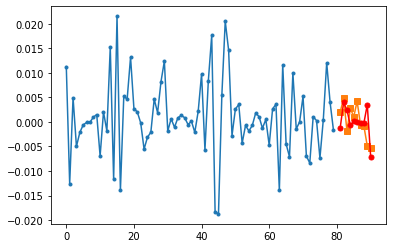

In [43]:
wave = 3
plot_vector_pred(prediction[wave], Y_train[wave], X_train[wave])

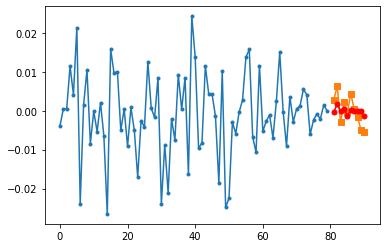

In [44]:
wave = 22
plot_vector_pred(prediction[wave], Y_train[wave], X_train[wave])

In [47]:
# Sequence-to-Sequence RNN
# Our Y will need adjusted again
num_predictions = 10
num_steps = 80
Y = np.empty( (10000, num_steps, num_predictions) )
for i in range(num_steps):
  Y[:, i, :] = dataset[:, i + 1:i + num_predictions + 1]

Y[4]

array([[-2.94441884e-03,  1.55802522e-03, -2.59077910e-03,
         9.75182680e-04, -7.67058844e-04,  1.75031656e-03,
        -5.43573074e-03,  3.76505691e-03, -5.36632687e-04,
         1.76388521e-03],
       [ 1.55802522e-03, -2.59077910e-03,  9.75182680e-04,
        -7.67058844e-04,  1.75031656e-03, -5.43573074e-03,
         3.76505691e-03, -5.36632687e-04,  1.76388521e-03,
         2.93861901e-04],
       [-2.59077910e-03,  9.75182680e-04, -7.67058844e-04,
         1.75031656e-03, -5.43573074e-03,  3.76505691e-03,
        -5.36632687e-04,  1.76388521e-03,  2.93861901e-04,
        -2.17298470e-03],
       [ 9.75182680e-04, -7.67058844e-04,  1.75031656e-03,
        -5.43573074e-03,  3.76505691e-03, -5.36632687e-04,
         1.76388521e-03,  2.93861901e-04, -2.17298470e-03,
         2.60015212e-03],
       [-7.67058844e-04,  1.75031656e-03, -5.43573074e-03,
         3.76505691e-03, -5.36632687e-04,  1.76388521e-03,
         2.93861901e-04, -2.17298470e-03,  2.60015212e-03,
        -4.

In [48]:
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]
Y.shape

(10000, 80, 10)

In [58]:
Y_train.shape

(7000, 80, 10)

In [49]:
# Now we can build a model with these new Y values
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]), 
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.TimeDistributed(keras.layers.Dense(num_predictions)) 
])

In [50]:
# compile the model
def last_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Nadam(lr=0.01)  
model.compile(loss="mse", optimizer=optimizer, metrics=[last_mse])
history = model.fit(X_train, Y_train, epochs=100, 
                    validation_data = (X_valid, Y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


219/219 [==============================] - 50s 214ms/step - loss: 0.0033 - last_mse: 0.0037 - val_loss: 8.8654e-05 - val_last_mse: 8.9568e-05
Epoch 2/100
219/219 [==============================] - 41s 187ms/step - loss: 9.6722e-05 - last_mse: 9.5351e-05 - val_loss: 8.0148e-05 - val_last_mse: 8.1782e-05
Epoch 3/100
219/219 [==============================] - 37s 171ms/step - loss: 8.4658e-05 - last_mse: 8.3033e-05 - val_loss: 8.2221e-05 - val_last_mse: 8.4231e-05
Epoch 4/100
219/219 [==============================] - 38s 173ms/step - loss: 8.7207e-05 - last_mse: 8.5162e-05 - val_loss: 7.6979e-05 - val_last_mse: 7.8759e-05
Epoch 5/100
219/219 [==============================] - 37s 169ms/step - loss: 8.1357e-05 - last_mse: 8.0095e-05 - val_loss: 7.9559e-05 - val_last_mse: 8.1194e-05
Epoch 6/100
219/219 [==============================] - 37s 167ms/step - loss: 8.3381e-05 - last_mse: 8.1517e-05 - val_loss: 7.6539e-05 - val_last_mse: 7.8296e-05
Epoch 7/100
219/219 [===========================

In [51]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 1s 18ms/step - loss: 7.7015e-05 - last_mse: 7.7927e-05


[7.701538561377674e-05, 7.792710675857961e-05]

In [62]:
predition = model.predict(X_train)

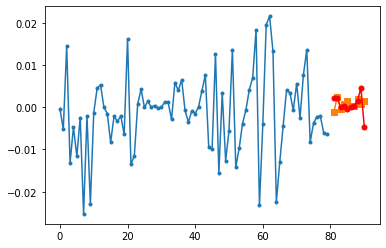

In [63]:
wave = 2
plot_vector_pred(predition[wave, -1], Y_train[wave, -1], X_train[wave]) # a little different than before because dimensions are different

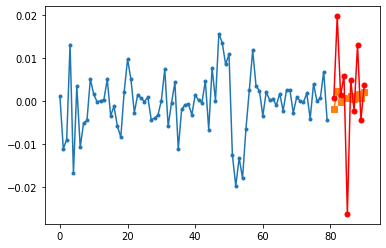

In [64]:
wave = 13
plot_vector_pred(predition[wave, -1], Y_train[wave, -1], X_train[wave])

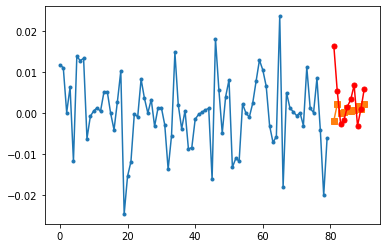

In [67]:
wave = 9
plot_vector_pred(predition[wave, -1], Y_train[wave, -1], X_train[wave])

**Part 4**</br>
Discuss your findings.

I predicted the next point in a wave using a Simple RNN and a Deep RNN. These both did a decent job of predicting the next point, but the Deep RNN had a little higher accuracy, so that is the best one for predicting the 81st point. 

Then I predicted the next ten points in a wave using a Sequence-to-Vector RNN and a Sequence-to-Sequence RNN. I thought the Seqence-to-Sequence RNN would be the best, but I was wrong. My Sequence-to-Vector RNN had higher accuracy, and you can see visually it did a better job by the example waves I displayed.